In [1]:
import numpy.random as rd
from math import *
import matplotlib.pyplot as plt
import ipywidgets as widgets

Vous savez tous que la série $\sum_{i=1}^n \frac{1}{i}$ ne converge pas, mais que la série alternée
$\sum_{i=1}^n \frac{(-1)^i}{i}$ converge.

Vous avez peut-être entendu parler du théorème de réarrangement de Riemman....
https://fr.wikipedia.org/wiki/Th%C3%A9or%C3%A8me_de_r%C3%A9arrangement_de_Riemann

On va considérer un cas naturel pour un probabiliste: au lieu d'avoir des signes alternés (du type $(-1)^i$), on va considérer des signes aléatoires!

# Série harmonique de signe aléatoire

On va étudier la série harmonique avec des signes aléatoires.
Soit $(X_i)_{i\geq 1}$ une suite de variables aléatoires indépendantes et de de loi $P(X_i=1) =P(X_i=-1) =\frac12$.
Autrement dit, $X_i$ vaut $+1$ avec probabilité $\frac12$ et vaut $-1$ avec probabilité $\frac12$, indépendamment des autres $X_j$.

On pose alors $S_0=0$, et pour $n\geq 1$
$$S_n = \sum_{i=1}^n \frac{X_i}{i} \, .$$
On cherche alors à savoir comment se comporte la suite aléatoire $(S_n)_{n\geq 0}$...

## Représentation graphique de la suite $(S_n)_{n\geq 0}$

On commence à définir une fonction qui renvoie +1 ou -1 avec probabilité 1/2

In [2]:
def Signe():
    u=rd.random()
    if u>0.5:
        return 1
    else:
        return -1

Puis une fonction qui prend en argument un entier $n$ et renvoie la suite $[S_0,S_1, \ldots, S_n]$

In [3]:
def Serie(n):
    S=[0]
    for i in range(n+1):
        S.append(S[i]+Signe()/(i+1))
    return S

On définit une fonction qui affiche le graphe de $k$ suites aléatoires $(S_n)_{n\geq 0}$ jusqu'à un rang $n$, ce qui permet de voir l'évolution de $S_n$ en fonction de $n$ (avec au maximum $n=100$). Vous pouvez exécuter de nouveau la cellule ci-dessous, en changeant le nombre $k$ de suites (aléatoires) que l'on considère, cela vous donnera aussi des suites aléatoires différentes.

In [4]:
k=5            ### Nombre de suites que l'on considère
n_max=100      ### Indice maximal que l'on considère

Series1=[Serie(n_max) for i in range(k)]
def DessinSeries1(n):
    for i in range(k):
        plt.plot(Series1[i][:n+1])
    plt.title("Représentation de k={} suites (S_i) jusqu'à n={}".format(k,n))

widgets.interact(DessinSeries1,n=widgets.IntSlider(value=1,min=1,max=100,step=1))

interactive(children=(IntSlider(value=1, description='n', min=1), Output()), _dom_classes=('widget-interact',)…

<function __main__.DessinSeries1(n)>

En allant plus loin, jusqu'à $n=10000$.

In [5]:
k=5            ### Nombre de suites que l'on considère
n_max2=1000     ### Indice maximal que l'on considère

Series2=[Serie(n_max2) for i in range(k)]
def DessinSeries2(n):
    for i in range(k):
        plt.plot(Series2[i][:n+1])
    plt.title("Représentation de k={} suites (S_i) jusqu'à n={}".format(k,n))

widgets.interact(DessinSeries2,n=widgets.IntSlider(value=10,min=10,max=n_max2,step=10))

interactive(children=(IntSlider(value=10, description='n', max=1000, min=10, step=10), Output()), _dom_classes…

<function __main__.DessinSeries2(n)>

#### Conclusion ?

1. La suite $(S_n)_{n\geq 0}$ semble converger *à chaque fois*... On peut en fait démontrer la chose suivante: l'événement ''la suite $(S_n)_{n\geq 0}$ converge'' a une probabilité $1$! Voir la Proposition 6.7 du poly (attention, la démonstration est difficile...)

2. La limite de la suite semble être différente à chaque fois. Si on pose $W = \lim_{n\to\infty} S_n$, il s'agit donc  d'une *variable aléatoire*, que l'on peut étudier (au moins à l'aide de simulations). Il s'avère que $W$ possède une densité, mais que celle-ci n'est pas explicite; les propriétés de la variable aléatoire $W$ continuent à être étudiées en recherche.

## Histogramme de la limite

On réécrit une fonction qui ne calcule que $S_n$ (pour ne pas avoir à stocker toute la suite), qui sera une valeur approchée de $W =\lim_{n\to\infty} S_n$ si $n$ est suffisamment grand.

In [6]:
def W(n):
    S=0
    for i in range(n):
        S+= Signe()/(i+1)
    return S

On va maintenant répéter un grand nombre de fois l'expérience *calculer $S_n$*, et tracer un histogramme des valeurs obtenues.

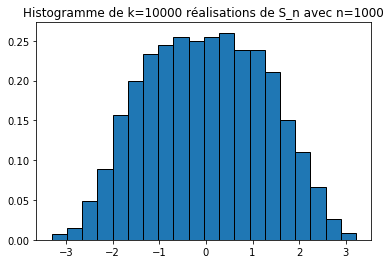

In [7]:
n=1000  ### la valeur de n pour laquelle S_n qui va nous servir d'approximation de W
k=10000 ### le nombre de répétitions de l'expérience (consistant à calculer S_n)

echantillon=[W(n) for i in range(k)]
plt.title('Histogramme de k={} réalisations de S_n avec n={}'.format(k,n))
plt.hist(echantillon,bins=20,density=True,edgecolor='black')
plt.show()

## Une autre série avec signe aléatoire

Cette fois, on va étudier la série avec signe aléatoire suivante: on pose $S_0=0$ et pour $n\geq 1$
$$S_n = \sum_{i=1}^n \frac{X_i}{i^{a}} \, ,$$
où $a>0$ est un paramètre. 

De même que précédemment, on se demande si cette suite aléatoire converge (si elle converge *à chaque fois*), ou plutôt pour quelles valeurs de $a$ elle converge.

In [8]:
def Serie2(a,n):
    S=[0]
    for i in range(n+1):
        S.append(S[i]+Signe()/(i+1)**a)
    return S

Quand on change la valeur de $a$, on change le comportement de la suite aléatoire $(S_n)_{n\geq 0}$.

In [9]:
k=5            ### Nombre de suites que l'on considère

def DessinSeries(a,n):
    m=int(n)
    Series=[Serie2(a,m) for i in range(k)]
    for i in range(k):
        plt.plot(Series[i])
    plt.title("Représentation de {} suites (S_i) jusqu'à n={}, pour a={}".format(k,m,a))

a_wid=widgets.FloatSlider(value=1,min=0.1,max=1,step=0.1,description='valeur de a')
n_wid=widgets.FloatLogSlider(value=1000,base=10,min=2,max=5,step=1,description='n=')
widgets.interact(DessinSeries,a=a_wid,n=n_wid)

interactive(children=(FloatSlider(value=1.0, description='valeur de a', max=1.0, min=0.1), FloatLogSlider(valu…

<function __main__.DessinSeries(a, n)>

Créons un histogramme, en fonction de $a$.

ATTENTION: le programme crée tous les histogrammes pour a=0.1, a=0.2, ... , a=1.5, pour pouvoir ensuite passer de l'un à l'autre rapidement.
Cela peut prendre du temps (entre 2 et 3 minutes sur mon ordinateur: vous pouvez réduire la valeur de $k$ pour aller plus vite, mais vous obtiendrez de moins jolis histogrammes...).

In [10]:
n=1000  ### la valeur de n pour laquelle S_n qui va nous servir d'approximation de W
k=10000 ### le nombre de répétitions de l'expérience (consistant à calculer S_n)

def W(a,n):
    S=0
    for i in range(n):
        S+= Signe()/(i+1)**a
    return S

H=[[[W(x/10,n) for i in range(k)]] for x in range(1,16)]

def Histo(a):
    plt.title('Histogramme de k={} réalisations de S_n avec n={}, pour a={}'.format(k,n,a))
    plt.hist(H[int(a*10)-1],bins=20,density=True,edgecolor='black')

a_wid=widgets.FloatSlider(value=1,min=0.1,max=1,step=0.1,description='valeur de a')
widgets.interact(Histo,a=a_wid)

interactive(children=(FloatSlider(value=1.0, description='valeur de a', max=1.0, min=0.1), Output()), _dom_cla…

<function __main__.Histo(a)>

Porter une attention au changement dans l'axe des $x$.

In [14]:
a_wid=widgets.FloatSlider(value=1,min=0.1,max=1.51,step=0.1,description='valeur de a')
widgets.interact(Histo,a=a_wid)

interactive(children=(FloatSlider(value=1.0, description='valeur de a', max=1.51, min=0.1), Output()), _dom_cl…

<function __main__.Histo(a)>